<!-- <div style="background-color:rgb(60,179,113,0.3)"> -->
<div style="background-color:#107acc">

<hr style="color:white">

# <span style="color:white"><center> Proyecto Final
## <span style="color:white"><center> Eduardo Alberto Domínguez Fontes

<hr style="color:white">
</div>

In [1]:
# Lectura de datos
import pandas as pd
import numpy as np

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Métricas, pipe, imputación, reescalamiento 
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV,RepeatedKFold,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

## <span style="color:blue">La base de datos está compuesta por los siguientes atributos:

 - Evaluación BI-RADS: 1 a 5 (ordinal).
 - Edad: edad del paciente en años (entero)
 - Forma: forma de la masa: redonda=1 ovalada=2 lobular=3 irregular=4 (nominal)
 - Margen: margen de masa: circunscrito=1 microlobulado=2 oscurecido=3 mal definido=4 espiculado=5 (nominal).
 - Densidad: densidad de masa alta = 1 iso = 2 baja = 3 que contiene grasa = 4 (ordinal)
 - Gravedad: benigno=0 o maligno=1 (binomial) (Target)

In [2]:
atributos=["Evaluacion_BI-RADS","Edad","Forma","Margen","Densidad","Gravedad"]
data=pd.read_csv("mammographic_masses.data.csv",names=atributos)
data

,Evaluacion_BI-RADS,Edad,Forma,Margen,Densidad,Gravedad
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


In [3]:
# BI-RADS es una evaluación de cuán confiable es la clasificación de gravedad; no es un atributo "predictivo" por lo que se descarta.
del data["Evaluacion_BI-RADS"]
data

,Edad,Forma,Margen,Densidad,Gravedad
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...
956,47.0,2.0,1.0,3.0,0
957,56.0,4.0,5.0,3.0,1
958,64.0,4.0,5.0,3.0,0
959,66.0,4.0,5.0,3.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Edad      956 non-null    float64
 1   Forma     930 non-null    float64
 2   Margen    913 non-null    float64
 3   Densidad  885 non-null    float64
 4   Gravedad  961 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 37.7 KB


In [5]:
data.describe()

,Edad,Forma,Margen,Densidad,Gravedad
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [6]:
# Verificamos si hay valores atípicos en los datos
print(data.Forma.value_counts())
print("------------------------------\n")  
print(data.Margen.value_counts())
print("------------------------------\n")  
print(data.Densidad.value_counts())

4.0    400
1.0    224
2.0    211
3.0     95
Name: Forma, dtype: int64
------------------------------

1.0    357
4.0    280
5.0    136
3.0    116
2.0     24
Name: Margen, dtype: int64
------------------------------

3.0    798
2.0     59
1.0     16
4.0     12
Name: Densidad, dtype: int64


In [7]:
# Verificamos la cantidad de datos faltantes en cada atributo:
data.isna().sum()

Edad         5
Forma       31
Margen      48
Densidad    76
Gravedad     0
dtype: int64

In [8]:
# Ya que vimos cuántos valores faltan en cada atributo y que la variable de respuesta no muestra valores faltantes, procedemos a separar los datos del target:
Y=data.Gravedad
del data["Gravedad"]
X=data

In [9]:
X

,Edad,Forma,Margen,Densidad
0,67.0,3.0,5.0,3.0
1,43.0,1.0,1.0,NaN
2,58.0,4.0,5.0,3.0
3,28.0,1.0,1.0,3.0
4,74.0,1.0,5.0,NaN
...,...,...,...,...
956,47.0,2.0,1.0,3.0
957,56.0,4.0,5.0,3.0
958,64.0,4.0,5.0,3.0
959,66.0,4.0,5.0,3.0


In [10]:
Y

0      1
1      1
2      1
3      0
4      1
      ..
956    0
957    1
958    0
959    1
960    0
Name: Gravedad, Length: 961, dtype: int64

In [11]:
# Verificamos si los datos de la variable de respuesta muestran algun desbalance:
Y.value_counts()

0    516
1    445
Name: Gravedad, dtype: int64

Para medir el desempeño predictivo, es necesario contar con los datos completos, para ello podemos seguir una serie de pasos:

1.- Dividir el conjunto de datos en entrenamiento y prueba.

2.- Completar los datos faltantes en el conjunto de entrenamiento.

3.- Entrenar el modelo.

4.- Completar datos faltantes en el conjunto de prueba aplicando la estrategia aprendida en el conjunto de entrenamiento.

5.- Hacemos las predicciones

6.- Medir el desempeño predictivo del modelo


## <span style="color:blue"> Regresión Logística

In [37]:
# Definimos la secuencia de pasos para completar, reescalar y entrenar el modelo, a través de un Pipeline:
Pipe_RL=make_pipeline(KNNImputer(n_neighbors=3),StandardScaler(),LogisticRegression(solver="liblinear"))

# Definimos el esquema de validación cruzada:
# cv=KFold(n_splits=10)
cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=1234)

# Calificamos el desempeño predictivo del modelo de a cuerdo a su exactitud:
scores=cross_val_score(Pipe_RL,X,Y,scoring="accuracy",cv=cv,n_jobs=-1)

print(f"La exactitud promedio obtenida es: {scores.mean():.4f}")

La exactitud promedio obtenida es: 0.7990


Veremos si es posible mejorar la exactitud del modelo al hacer una calibración de los hiperparámetros mediante una busqueda por rejilla, así como agregar una penalización al modelo, mediante el hiperparámetro C:

In [38]:
# Definimos el espacio de parámetros:
espacio_param={"knnimputer__n_neighbors":np.arange(1,20,1),
               "logisticregression__C":[0.000001,0.000001,0.00001,0.0001,0.001,0.01,0.1]}

# Definimos los pasos a través del pipeline:
Pipe=make_pipeline(KNNImputer(),StandardScaler(),LogisticRegression(solver="liblinear"))

# Definimos la rejilla:
Rejilla=GridSearchCV(Pipe,param_grid=espacio_param,scoring="accuracy",cv=cv,n_jobs=-1)
Rejilla.fit(X,Y)

# Imprimimos los resultados:
print(f"La mejor configuración de hiperparámetros es: {Rejilla.best_params_}")
print(f"El mejor valor de las métricas es: {Rejilla.best_score_}")
rlog=Rejilla.best_score_

La mejor configuración de hiperparámetros es: {'knnimputer__n_neighbors': 1, 'logisticregression__C': 0.1}
El mejor valor de las métricas es: 0.8010481099656357


## <span style="color:blue"> Árbol de decisión

In [39]:
# Vamos a calibrar el modelo, definiendo los pasos para entrenar el modelo a través de un pipeline
Pipe_Arbl=make_pipeline(KNNImputer(),StandardScaler(),DecisionTreeClassifier(criterion="entropy"))

# Espacio de parámetros
Param_Arbol={"knnimputer__n_neighbors":np.arange(1,15),
               "decisiontreeclassifier__min_samples_leaf":np.arange(1,20,2),
               "decisiontreeclassifier__max_depth":np.arange(1,20,2)}

# Rejilla de busqueda
Rejilla_Arbol=GridSearchCV(Pipe_Arbl,param_grid=Param_Arbol,scoring="accuracy",cv=cv,n_jobs=-1)
Rejilla_Arbol.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_Arbol.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_Arbol.best_score_}")
arbol=Rejilla_Arbol.best_score_

Mejor calibración de los hiperparámetros: {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 19, 'knnimputer__n_neighbors': 13}
Mejor valor de las métricas: 0.8087693298969073


## <span style="color:blue"> Bosques Aleatorios:

In [40]:
# Calibración del modelo:
espacio_param_bosque={"knnimputer__n_neighbors":np.arange(1,15,2),
               "randomforestclassifier__max_depth":np.arange(1,20,2),
               "randomforestclassifier__min_samples_leaf":np.arange(1,20,2)} 

# Definimos la sentencia de pasos para entrenar el modelo mediante un pipeline:
Pipe_3=make_pipeline(KNNImputer(),StandardScaler(),
                   RandomForestClassifier(n_estimators=100,criterion="entropy",class_weight="balanced"))

# Rejilla de búsqueda:
Rejilla_bosque=GridSearchCV(Pipe_3,param_grid=espacio_param_bosque,scoring="accuracy",cv=cv,n_jobs=-1)
Rejilla_bosque.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_bosque.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_bosque.best_score_}")
bosque=Rejilla_bosque.best_score_

Mejor calibración de los hiperparámetros: {'knnimputer__n_neighbors': 3, 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__min_samples_leaf': 11}
Mejor valor de las métricas: 0.8112628865979381


## <span style="color:blue"> Naive Bayes

In [41]:
# Calibración del modelo:
espacio_param_naive={"knnimputer__n_neighbors":np.arange(1,20)} 

# Definimos la sentencia de pasos para entrenar el modelo mediante un pipeline, utilizando los atributos del modelo anterior:
Pipe_5=make_pipeline(KNNImputer(),StandardScaler(),GaussianNB())

# Rejilla de búsqueda:
Rejilla_Naive=GridSearchCV(Pipe_5,param_grid=espacio_param_naive,scoring="accuracy",cv=cv,n_jobs=-1)
Rejilla_Naive.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_Naive.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_Naive.best_score_}")
bayes=Rejilla_Naive.best_score_

Mejor calibración de los hiperparámetros: {'knnimputer__n_neighbors': 1}
Mejor valor de las métricas: 0.7889841065292096


## <span style="color:blue"> Maquinas de Vector Soporte (SVM)

### <span style="color:blue"> Kernel Lineal

In [42]:
#Calibramos el modelo mediante una busqueda por rejilla
espacio_param_SVM={"knnimputer__n_neighbors":np.arange(1,15),
                   "linearsvc__C":[0.000001,0.000001,0.00001,0.0001,0.001,0.01,0.1]}

# Definimos la secuencia de pasos:
PipeSVM=make_pipeline(KNNImputer(),StandardScaler(),LinearSVC(loss="hinge"))

# Rejilla de busqueda
Rejilla_SVM=GridSearchCV(PipeSVM,param_grid=espacio_param_SVM,scoring="accuracy",cv=cv,n_jobs=-1)
Rejilla_SVM.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_SVM.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_SVM.best_score_}")
klineal=Rejilla_SVM.best_score_

Mejor calibración de los hiperparámetros: {'knnimputer__n_neighbors': 1, 'linearsvc__C': 1e-06}
Mejor valor de las métricas: 0.7968857388316151


### <span style="color:blue"> Kernel no Lineal

In [43]:
# Calibramos el modelo
espacio_param_rbf={"knnimputer__n_neighbors":np.arange(1,15),
               "svc__C":[0.000001,0.000001,0.00001,0.0001,0.001,0.01,0.1],
               "svc__gamma":[0.0001,0.001,0.01,0.1,0.15,0.2,0.3]}

# Definimos la serie de pasos:
pipe_gamma=make_pipeline(KNNImputer(),StandardScaler(),SVC(kernel="rbf",))

# Rejilla de busqueda
rejilla_rbf=GridSearchCV(pipe_gamma,param_grid=espacio_param_rbf,scoring="accuracy",cv=cv,n_jobs=-1)
rejilla_rbf.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {rejilla_rbf.best_params_}")
print(f"Mejor valor de las métricas: {rejilla_rbf.best_score_}")
krbf=rejilla_rbf.best_score_

Mejor calibración de los hiperparámetros: {'knnimputer__n_neighbors': 1, 'svc__C': 0.1, 'svc__gamma': 0.2}
Mejor valor de las métricas: 0.7975171821305842


## <span style="color:blue"> K-Vecinos

In [44]:
# Vamos a calibrar el modelo a través de la búsqueda por rejilla:
espacio_param_Knn={"kneighborsclassifier__n_neighbors":np.arange(1,20),
                   "knnimputer__n_neighbors":np.arange(1,20)} 

# Definimos la secuencia de pasos para el modelo mediante un pipeline:
Pipe_9=make_pipeline(KNNImputer(),StandardScaler(),KNeighborsClassifier())

# Rejilla de busqueda
Rejilla_Knn=GridSearchCV(Pipe_9,param_grid=espacio_param_Knn,scoring="accuracy",cv=cv,n_jobs=-1)
Rejilla_Knn.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_Knn.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_Knn.best_score_}")
vecinos=Rejilla_Knn.best_score_

Mejor calibración de los hiperparámetros: {'kneighborsclassifier__n_neighbors': 13, 'knnimputer__n_neighbors': 1}
Mejor valor de las métricas: 0.796683848797251


## <span style="color:blue"> K-Vecinos Ponderados

In [45]:
# Vamos a calibrar el modelo a través de la búsqueda por rejilla:
espacio_param_Knn_Pond={"kneighborsclassifier__n_neighbors":np.arange(1,20),
                   "kneighborsclassifier__weights":["uniform","distance"],
                   "kneighborsclassifier__p":np.arange(1,20)}

# Definimos la secuencia de pasos para el modelo mediante un pipeline:
Pipe_10=make_pipeline(KNNImputer(),StandardScaler(),KNeighborsClassifier())

# Rejilla de busqueda
Rejilla_Knn_Pond=GridSearchCV(Pipe_10,param_grid=espacio_param_Knn_Pond,scoring="accuracy",cv=cv,n_jobs=-1)
Rejilla_Knn_Pond.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_Knn_Pond.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_Knn_Pond.best_score_}")
ponderados=Rejilla_Knn_Pond.best_score_

Mejor calibración de los hiperparámetros: {'kneighborsclassifier__n_neighbors': 13, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Mejor valor de las métricas: 0.7981400343642612


# <span style="color:blue"><center> Comparación de la Exactitud

#### Creamos un nuevo DataFrame en el cual se guardarán los valores obtenidos de la excatitud para cada modelo.

In [46]:
# comparaciones=pd.DataFrame()
comparaciones["Modelos"]=["Reg. Logística", "Árbol de Decisión", "Bosques Aleatorios", "Naive Bayes", "SVM Lineal", "SVM rbf", "K-Vecinos", "K-Vecinos Ponderados"]
# comparaciones["Accuracy - Kfolds"]=[rlog,arbol,bosque,bayes,klineal,krbf,vecinos,ponderados]
comparaciones["Accuracy - RepeatedKFolds"]=[rlog,arbol,bosque,bayes,klineal,krbf,vecinos,ponderados]

In [47]:
comparaciones

,Modelos,Accuracy - Kfolds,Accuracy - RepeatedKFolds
0,Reg. Logística,0.804424,0.801048
1,Árbol de Decisión,0.814820,0.808769
2,Bosques Aleatorios,0.811662,0.811263
3,Naive Bayes,0.785685,0.788984
4,SVM Lineal,0.797165,0.796886
5,SVM rbf,0.799216,0.797517
6,K-Vecinos,0.793976,0.796684
7,K-Vecinos Ponderados,0.792912,0.798140


## <span style="color:blue"><center> Red Neuronal: Perceptrón Simple Multicapa (MLP)

In [12]:
# Dividimos el conjunto de datos en entrenamiento y prueba
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

# Estandarizamos los atributos
escalamiento=make_pipeline(KNNImputer(n_neighbors=6),StandardScaler())
X_train=escalamiento.fit_transform(X_train)
X_test=escalamiento.transform(X_test)

### <center>    Arquitectura del modelo

In [13]:
modelo=Sequential()
modelo.add(Dense(units=16, input_dim=X.shape[1], activation="relu"))
modelo.add(Dropout(0.3))
modelo.add(Dense(units=12,activation="relu"))
modelo.add(Dropout(0.3))
modelo.add(Dense(units=8,activation="relu"))
modelo.add(Dropout(0.3))
modelo.add(Dense(units=1,activation="sigmoid"))

### <center>    Compilación del modelo

In [14]:
modelo.compile(optimizer="adam", loss="binary_crossentropy",metrics="accuracy")
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

### <center>    Entrenamiento del modelo

In [15]:
print("Comenzando el entrenamiento del modelo...")
historial=modelo.fit(X_train,Y_train,epochs=1000,batch_size=20,validation_data=(X_test,Y_test),verbose=False)
print("Entrenamiento finalizado")

Comenzando el entrenamiento del modelo...
Entrenamiento finalizado


### <center> Valores de la Precisión

In [16]:
print(f"Precisión máxima en el conjunto de entrenamiento: {max(historial.history['accuracy'])}")
print(f"Precisión máxima en el conjunto de validación: {max(historial.history['val_accuracy'])} \n")

print(f"Precisión promedio en el conjunto de entrenamiento: {max(historial.history['accuracy'])}")
print(f"Precisión promedio en el conjunto de validación: {max(historial.history['val_accuracy'])}")

Precisión máxima en el conjunto de entrenamiento: 0.828125
Precisión máxima en el conjunto de validación: 0.818652868270874 

Precisión promedio en el conjunto de entrenamiento: 0.828125
Precisión promedio en el conjunto de validación: 0.818652868270874


### <center> Gráficas

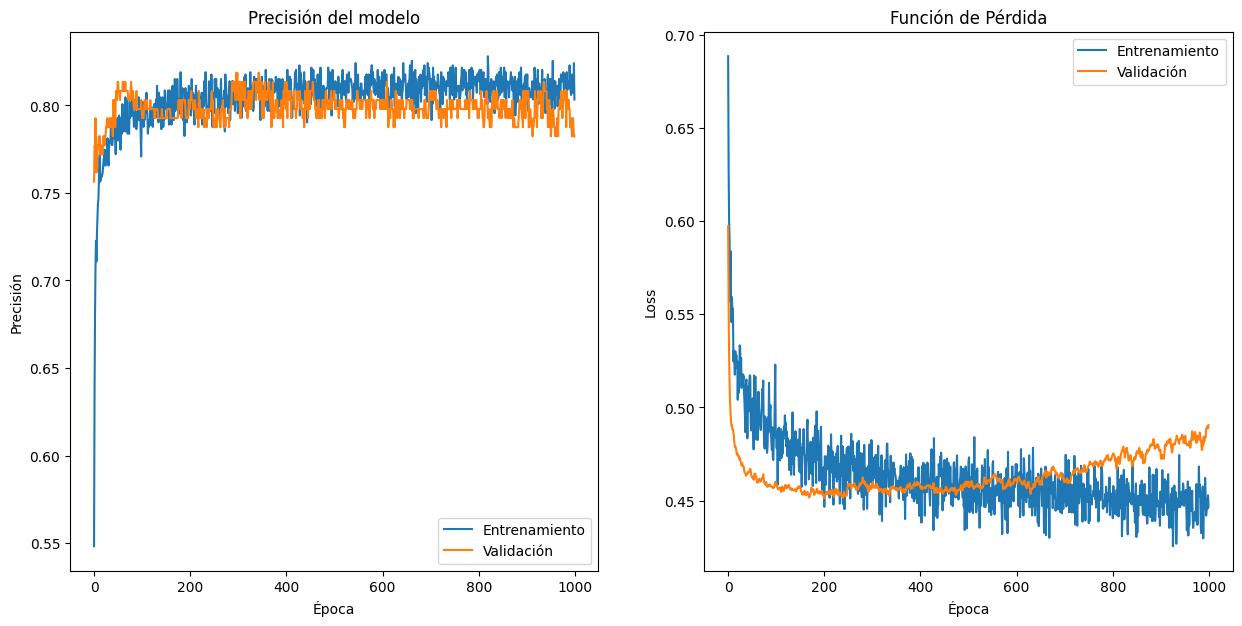

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'])


plt.subplot(1,2,2)
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.title('Función de Pérdida')
plt.ylabel('Loss')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'] )
plt.show()

plt.tight_layout()
plt.show()